In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#tipo de renda: 1- empresário; 2- autônomo; 3- assalariado
# possui imóvel: 1- não; 2- sim
#comprou: 0- não; 1-sim

tabela = pd.read_excel("BaseDados_RegressaoLogistica.xlsx")
display(tabela)

,Id Cliente,Renda,Tipo Renda,Possui Imóvel,Comprou?
0,1,10480,1,2,1
1,2,6182,2,2,1
2,3,6387,3,1,0
3,4,6528,1,2,0
4,5,8269,1,2,0
...,...,...,...,...,...
95,96,3238,1,2,0
96,97,10701,1,2,1
97,98,14732,1,2,0
98,99,4790,1,2,1


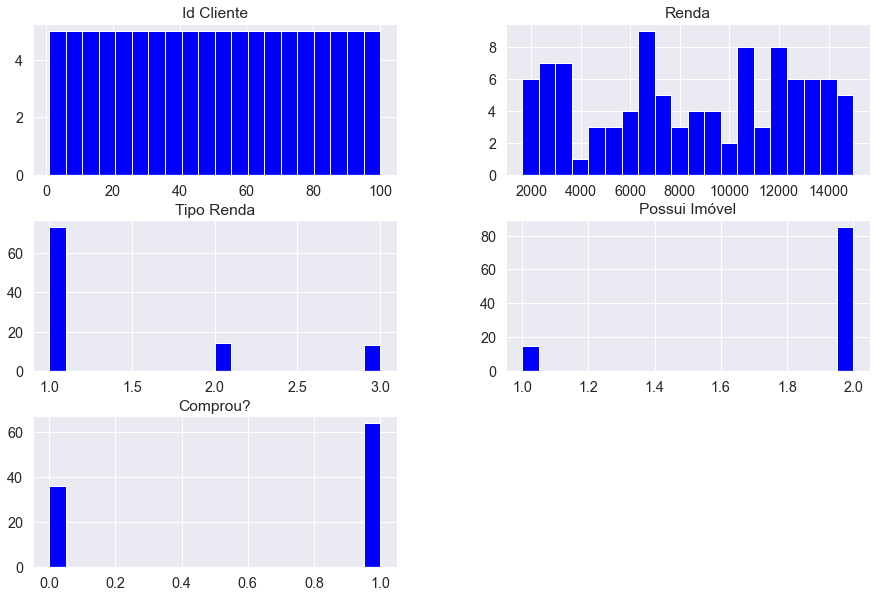

In [3]:
#sns.set para plotar todos os gráficos de uma vez
# 'figure.figsize': tamanho da plotagem
sns.set(font_scale=1.3, rc={'figure.figsize':(15,10)})

#bins: largura da barra; quanto maior o "bins", menor a largura
eixo = tabela.hist( bins=20, color='blue')

<AxesSubplot:xlabel='Tipo Renda', ylabel='Renda'>

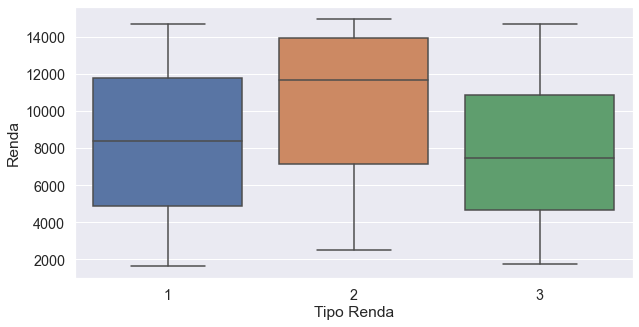

In [4]:
plt.figure(figsize=(10,5))
sns.boxplot(data=tabela, x='Tipo Renda', y='Renda')

<AxesSubplot:xlabel='Possui Imóvel', ylabel='Renda'>

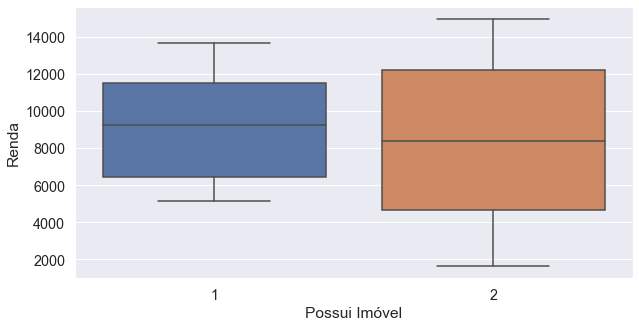

In [5]:
plt.figure(figsize=(10,5))
sns.boxplot(data=tabela, x='Possui Imóvel', y='Renda')

<AxesSubplot:xlabel='Comprou?', ylabel='Renda'>

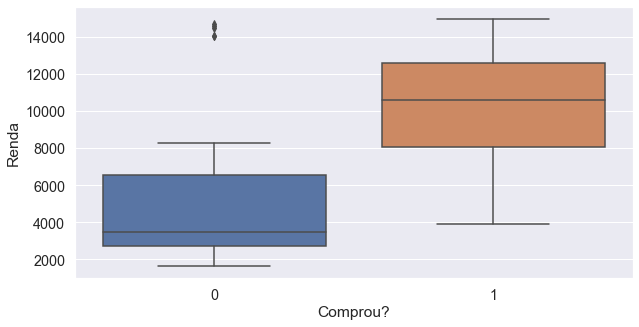

In [6]:
# outliers: pontos fora da curva/amostragem
plt.figure(figsize=(10,5))
sns.boxplot(data=tabela, x='Comprou?', y='Renda')

<AxesSubplot:xlabel='Renda', ylabel='Comprou?'>

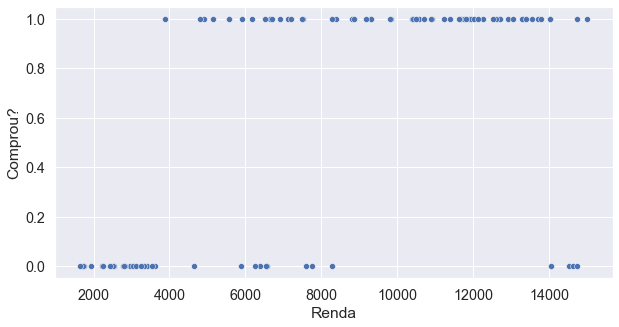

In [7]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=tabela, x='Renda', y='Comprou?')

In [8]:
caracteristica = tabela.iloc[:,1:4].values
previsor = tabela.iloc[:,4:5].values
display(caracteristica)
display(previsor)

array([[10480,     1,     2],
       [ 6182,     2,     2],
       [ 6387,     3,     1],
       [ 6528,     1,     2],
       [ 8269,     1,     2],
       [ 6903,     1,     2],
       [ 1947,     1,     2],
       [14008,     1,     2],
       [ 2213,     1,     2],
       [13321,     2,     2],
       [14043,     3,     2],
       [ 5561,     1,     2],
       [11890,     1,     2],
       [13308,     1,     2],
       [11666,     1,     2],
       [ 3395,     1,     2],
       [ 8854,     2,     2],
       [ 1760,     3,     2],
       [ 7761,     1,     2],
       [ 2952,     1,     2],
       [ 4904,     1,     2],
       [ 2262,     1,     2],
       [13274,     1,     2],
       [ 2546,     1,     2],
       [10393,     2,     2],
       [10901,     3,     2],
       [ 9271,     1,     1],
       [11230,     1,     1],
       [12908,     1,     1],
       [ 6543,     1,     1],
       [11742,     1,     2],
       [ 6578,     2,     2],
       [10555,     3,     1],
       [ 8

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [9]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(caracteristica, previsor)
print(len(x_treino))
print(len(x_teste))

75
25


In [10]:
from sklearn.linear_model import LogisticRegression
funcao_logistica = LogisticRegression()
funcao_logistica.fit(x_treino, y_treino)
print(funcao_logistica)

LogisticRegression()


C:\Users\Rafael\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
#predict: função para prever
previsoes = funcao_logistica.predict(x_teste)
display(previsoes)

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [12]:
y_teste

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]], dtype=int64)

In [15]:
#assertividade
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_teste, previsoes))

[[ 6  4]
 [ 1 14]]


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.78      0.93      0.85        15

    accuracy                           0.80        25
   macro avg       0.82      0.77      0.78        25
weighted avg       0.81      0.80      0.79        25



In [17]:
from sklearn.metrics import r2_score
print(r2_score(y_teste, previsoes))

0.16666666666666674


In [23]:
#novo cliente
salario = 11500
Tipo_Renda = 1
Possui_Imovel = 0

parametro = [[salario, Tipo_Renda, Possui_Imovel]]
fazendo_previsao = funcao_logistica.predict(parametro)
probabilidade = funcao_logistica.predict_proba(parametro)

if fazendo_previsao == 0:
    print('não irá comprar')
    print(probabilidade)
else:
    print('vai comprar')
    print(probabilidade)

vai comprar
[[0.03005329 0.96994671]]
